# Project: Wrangling and Analyze Data

## INTRODUCTION

Dogs make great companies and this makes individuals develop huge and varying sentiments toward their dogs over time. WeRateDogs is a Twitter account that helps people express these sentiments by rating people's dogs with a humorous comment about the dogs.This project seeks to obtain tweets about dogs including their ratings, retweet counts, favorite counts, analyze and visualize these data. It also aims to potentially ascertain the level of individual's sentiment towards dogs of different stages and how much people tweet about their dogs on different week days.

## Data Gathering

In [1]:
# import packages to be used 

import pandas as pd
import numpy as np
import requests
import os
from bs4 import BeautifulSoup
import tweepy
from tweepy import OAuthHandler
import json
import wptools
from timeit import default_timer as timer
import glob


In [2]:
pip install tweepy


The following command must be run outside of the IPython shell:

    $ pip install tweepy

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
# Download WeRateDogs Twitter Archive file

twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [4]:
image_df = pd.read_csv('image-predictions.tsv', sep= '\t')
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)

2356

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from twython import Twython

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [9]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
15

Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
18

Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
20

Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
23

In [6]:
tweets_data= []
tweets_file = open("tweet_json.txt", "r")
for line in tweets_file:
    tweet = (json.loads(line))
    tweet_id = tweet['id']
    retweet_count = tweet['retweet_count']
    favorite_count = tweet['favorite_count']
    tweets_data.append({'retweet_count' : retweet_count,
               'favorite_count' : favorite_count,
               'tweet_id' : tweet_id})

df = pd.DataFrame(tweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [8]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_df[image_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [12]:
image_df.img_num.unique()

array([1, 4, 2, 3])

In [13]:
image_df.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
250     0.071124
145     0.071536
680     0.072885
701     0.081101
1831    0.082489
18      0.086502
109     0.088530
568     0.088540
301     0.089165
1627    0.090341
1503    0.090341
954     0.090508
277     0.096063
2074    0.097049
664     0.097232
789     0.097500
515     0.098283
1664    0.099804
731     0.100499
1723    0.100896
1037    0.105171
247     0.107317
876     0.107948
866     0.110587
1245    0.111493
          ...   
76      0.999091
1988    0.999120
2045    0.999201
863     0.999223
1872    0.999281
1548    0.999306
95      0.999335
611     0.999365
1711    0.999403
512     0.999484
168     0.999614
107     0.999647
1796    0.999715
1455    0.999823
1687    0.999828
1725    0.999833
331     0.999834
1014    0.999837
594     0.999846
475     0.999876
865     0.999885
45      0.999888
1447    0.999916
242     0.999924
230     0.999945
1372    0.999953
149     0.999956
1229    0.9999

In [14]:
image_df.p2_conf.sort_values()

106     1.011300e-08
1299    1.002880e-05
1229    1.448950e-05
230     1.763430e-05
1372    2.335910e-05
242     2.987300e-05
149     4.309810e-05
1796    4.629670e-05
45      5.514170e-05
1455    5.644850e-05
475     5.867490e-05
1711    6.229490e-05
1687    6.780610e-05
594     7.191480e-05
1447    7.657020e-05
95      8.106320e-05
331     8.675670e-05
865     9.758170e-05
1548    1.131290e-04
1014    1.169070e-04
1536    1.529990e-04
512     1.582170e-04
513     1.589610e-04
1725    1.596210e-04
107     1.811500e-04
863     1.865250e-04
94      2.010840e-04
168     2.280900e-04
2045    3.611780e-04
1872    3.700800e-04
            ...     
650     4.034200e-01
869     4.034510e-01
2037    4.042910e-01
13      4.047220e-01
2030    4.060440e-01
186     4.065500e-01
662     4.111820e-01
1834    4.140020e-01
1904    4.153740e-01
1219    4.164780e-01
1036    4.184830e-01
601     4.201190e-01
127     4.253030e-01
721     4.302750e-01
1046    4.306240e-01
605     4.316570e-01
1436    4.321

In [15]:
# Check to know that none of the confidence level for each prediction is greater than 1

image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
dog_names = image_df.query('p1_dog == True')

dog_names.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1806,832369877331693569,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1,kelpie,0.504690,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True
1235,746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,1,toy_poodle,0.508292,True,Lakeland_terrier,0.234458,True,affenpinscher,0.084563,True
54,667044094246576128,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1,golden_retriever,0.765266,True,Labrador_retriever,0.206694,True,seat_belt,0.010667,False
1189,739606147276148736,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True
1562,793500921481273345,https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg,2,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
1558,793241302385262592,https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg,1,golden_retriever,0.559308,True,Labrador_retriever,0.390222,True,cocker_spaniel,0.036316,True
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True
1346,759197388317847553,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,1,kuvasz,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,papillon,0.009736,True


In [17]:
not_dog_names = image_df.query('p1_dog == False')

not_dog_names.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
117,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False
1197,740676976021798912,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,0.043559,False
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian_camel,0.999614,False,bison,0.000228,False,llama,0.000067,False
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
205,669923323644657664,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,0.080148,False
839,694356675654983680,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,hamster,0.429871,False,Pomeranian,0.144272,True,pretzel,0.127220,False
1509,785927819176054784,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1,teddy,0.972070,False,toy_poodle,0.008493,True,chow,0.002883,True
1745,822975315408461824,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,bathtub,0.331098,False,tub,0.248860,False,Pembroke,0.233162,True


In [18]:
not_dog_names.p1.unique()

array(['box_turtle', 'shopping_cart', 'hen', 'desktop_computer',
       'three-toed_sloth', 'ox', 'guinea_pig', 'coho', 'llama',
       'seat_belt', 'snail', 'triceratops', 'swab', 'hay', 'hyena',
       'jigsaw_puzzle', 'vacuum', 'teddy', 'porcupine', 'goose', 'hare',
       'electric_fan', 'web_site', 'ibex', 'fire_engine', 'lorikeet',
       'toyshop', 'common_iguana', 'frilled_lizard', 'leatherback_turtle',
       'hamster', 'Angora', 'Arctic_fox', 'trombone', 'canoe',
       'king_penguin', 'shopping_basket', 'bearskin', 'bustard',
       'crash_helmet', 'ski_mask', 'shower_curtain', 'jellyfish',
       'doormat', 'Arabian_camel', 'lynx', 'hog', 'comic_book', 'minivan',
       'seashore', 'cuirass', 'candle', 'weasel', 'Christmas_stocking',
       'washbasin', 'car_mirror', 'piggy_bank', 'pot', 'boathouse',
       'mud_turtle', 'platypus', 'ping-pong_ball', 'sea_urchin', 'bow_tie',
       'window_shade', "jack-o'-lantern", 'sorrel', 'peacock', 'axolotl',
       'wool', 'banana', '

In [19]:
dog_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


In [20]:
dog_names.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'chow', 'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'Italian_greyhound', 'Maltese_dog', 'malamute',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'toy_terrier', 'Blenheim_spaniel',
       'Pembroke', 'Chesapeake_Bay_retriever', 'curly-coated_retriever',
       'dalmatian', 'Ibizan_hound', 'Border_collie', 'Labrador_retriever',
       'miniature_schnauzer', 'Airedale', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'Rottweiler',
       'Siberian_husky', 'papillon', 'Saint_Bernard', 'Tibetan_terrier',
       'borzoi', 'beagle', 'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier', 'bas

In [21]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
twitter_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
twitter_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [28]:
twitter_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [29]:
twitter_df.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


### Quality issues

#### twitter_df_clean
1. Some tweets are retweets.
2. Some tweets are replies.
3. Some columns are not relevant to the analysis.
4. Incorrect datatype for timestamp column.
5. rating_denominator for tweet_id, 835246439529840640, is incorrect.

#### image_df_clean
6. Drop jpg_url column.
7. Remame img_num column for more clarity.
8. tweet_id columns in all three datasets are stored as numeric values.


### Tidiness issues
1. time_stamp column should be split into two - date and time

2.  dog_stage is distributed across four columns(doggo, pupper, floofer, puppo)

3. All three tables(df_clean, twitter_df_clean and image_df_clean) should be merged into one dataframe to contain only tweets with images.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data

image_df_clean = image_df.copy()
df_clean = df.copy()
twitter_df_clean = twitter_df.copy()

### Issue #1 and #2: Some tweets are retweets and some tweets are replies.


#### Define:
1. Extract all observations in the twitter_df_clean dataset which do not have values in the in_reply_to_status_id or retweeted_status_id columns. Absence of values in these columns is an indication that they are original tweets(not retweets or replies). 
2. Drop the in_reply_to_status_id, retweeted_status_id columns, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp columns.
                             
                              

#### Code:

In [31]:
# To remove the retweets
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_id.isnull()]
# To remove the replies
twitter_df_clean = twitter_df_clean[twitter_df_clean.in_reply_to_status_id.isnull()]

In [32]:
#drop columns
twitter_df_clean = twitter_df_clean.drop(['in_reply_to_status_id',
                              'in_reply_to_user_id',
                              'retweeted_status_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp'],
                            axis = 1)

#### Test:

In [33]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: Incorrect datatype for timestamp column

#### Define: Change datatype for timestamp column to datetime

In [34]:
twitter_df_clean['timestamp'] = twitter_df_clean['timestamp'].astype('datetime64[ns]')

#### Test:

In [35]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #4: Some columns are not needed for analysis.

#### Define: Drop other columns(text, expanded_urls, source) that are not relevant to analysis

#### Code:

In [36]:
twitter_df_clean.drop(['text', 'expanded_urls', 'source'], axis=1, inplace=True)

#### Test:

In [37]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


### Issue #5: rating_denominator for tweet_id, 835246439529840640, is incorrect

#### Define: Change rating denominator for tweet_id, 835246439529840640 to 0

#### Code:

In [39]:
twitter_df_clean["rating_denominator"].replace({0: 10}, inplace=True)

#### Test:

In [42]:
twitter_df_clean.query('rating_denominator == 0')

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6: Drop jpg_url column

#### Define: 
Drop the jpg_url column in image_df_clean

#### Code:

In [43]:
image_df_clean.drop(['jpg_url'], axis=1, inplace=True)


#### Test:

In [44]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.8+ KB


### Issue #7: Rename img_num column for more clarity

#### Define: For more clarity, rename img_num column to image_number in image_df_clean

#### Code:

In [45]:
image_df_clean.rename(columns = {'img_num':'image_number'}, inplace = True)

#### Test:

In [46]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id        2075 non-null int64
image_number    2075 non-null int64
p1              2075 non-null object
p1_conf         2075 non-null float64
p1_dog          2075 non-null bool
p2              2075 non-null object
p2_conf         2075 non-null float64
p2_dog          2075 non-null bool
p3              2075 non-null object
p3_conf         2075 non-null float64
p3_dog          2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.8+ KB


### Issue #8: tweet_id column in all three datasets are stored as numeric values

#### Define: Change datatype for all tweet_id columns to string

#### Code:

In [47]:
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].astype('str')
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype('str')
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')

#### Test:

In [48]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id        2075 non-null object
image_number    2075 non-null int64
p1              2075 non-null object
p1_conf         2075 non-null float64
p1_dog          2075 non-null bool
p2              2075 non-null object
p2_conf         2075 non-null float64
p2_dog          2075 non-null bool
p3              2075 non-null object
p3_conf         2075 non-null float64
p3_dog          2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


In [49]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


## Tidiness Issues

### Issue #1: Dog stages are distributed across four columns(doggo, pupper, floofer and puppo)

#### Define: Dog stages are distributed are distributed across four columns. To resolve this,:
1. create an extra column called 'unknown' to categorize dogs without a recognized stage.
2. create a new dataframe called 'dogs' by extracting tweet_id, name, doggo, floofer, pupper, puppo, unknown, rating_numerator and rating_denominator columns from twitter_df_clean dataset.
3. drop columns in the twitter_df_clean dataset that are present in the dogs dataframe. Rename the dataframe 'tweets'.
4. melt the different dog stages into a new columns called 'dog_stage' and 'value'.
5. clean the duplicated rows created in the previous process and drop the 'value' variable

#### Code:

In [51]:
# first,create an extra column to group those dogs without a recognized stage. This will help cleaning the dataset later.
def u(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'not_known'
    else:
        val ='None'
    return val

twitter_df_clean['unknown'] = twitter_df.apply(u, axis=1)

twitter_df_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,unknown
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,None,None,None,None,not_known
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,None,None,None,None,not_known
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,None,None,None,None,not_known
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,None,None,None,None,not_known
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,None,None,None,None,not_known


In [52]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
unknown               2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB


In [53]:
# Data about dogs

dogs = twitter_df_clean[['tweet_id', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'unknown', 'rating_numerator', 'rating_denominator']].copy()
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
unknown               2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


In [54]:
# Drop identical dogs columns in twitter_df_clean

tweets = twitter_df_clean.drop(['name', 'doggo', 'floofer', 'pupper', 'puppo', 'unknown', 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [55]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 2 columns):
tweet_id     2097 non-null object
timestamp    2097 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 49.1+ KB


In [56]:
# melt the different dog stages into a new column called 'dog_stage'
dogs = pd.melt(dogs, id_vars =['tweet_id', 'name', 'rating_numerator','rating_denominator'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],
                     var_name = 'dog_stage', 
                    value_name = 'value')

dogs.head(20)

,tweet_id,name,rating_numerator,rating_denominator,dog_stage,value
0,892420643555336193,Phineas,13,10,doggo,None
1,892177421306343426,Tilly,13,10,doggo,None
2,891815181378084864,Archie,12,10,doggo,None
3,891689557279858688,Darla,13,10,doggo,None
4,891327558926688256,Franklin,12,10,doggo,None
5,891087950875897856,None,13,10,doggo,None
6,890971913173991426,Jax,13,10,doggo,None
7,890729181411237888,None,13,10,doggo,None
8,890609185150312448,Zoey,13,10,doggo,None
9,890240255349198849,Cassie,14,10,doggo,doggo


In [57]:
dogs.value.unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo', 'not_known'], dtype=object)

In [58]:
# clean the duplicated rows created in the previous process and drop the 'value' variable
dogs = dogs[dogs['value']!= 'None']

dogs = dogs.drop('value', axis=1)

#### Test:

In [59]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 9 to 10484
Data columns (total 5 columns):
tweet_id              2108 non-null object
name                  2108 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
dog_stage             2108 non-null object
dtypes: int64(2), object(3)
memory usage: 98.8+ KB


### Issue #2: timestamp column should be split into two.

#### Define: Split the timestamp column in twitter_df_clean into date and time columns

#### Code:

In [60]:
#split columns
twitter_df_clean["date"] = twitter_df_clean["timestamp"].dt.date
twitter_df_clean["time"] = twitter_df_clean["timestamp"].dt.time

#### Test:

In [61]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 4 columns):
tweet_id     2097 non-null object
timestamp    2097 non-null datetime64[ns]
date         2097 non-null object
time         2097 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 81.9+ KB


### Issue #3: Create a new column that will aid analysis

#### Define: Create a new column ('day_created') for the name of the week day on which the tweet was created and drop timestamp column.

#### Code:

In [62]:
twitter_df_clean['day_created'] = twitter_df_clean['timestamp'].dt.day_name()


#### Test:

In [63]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id       2097 non-null object
timestamp      2097 non-null datetime64[ns]
date           2097 non-null object
time           2097 non-null object
day_created    2097 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 98.3+ KB


In [64]:
twitter_df_clean.head(5)

,tweet_id,timestamp,date,time,day_created
0,892420643555336193,2017-08-01 16:23:56,2017-08-01,16:23:56,Tuesday
1,892177421306343426,2017-08-01 00:17:27,2017-08-01,00:17:27,Tuesday
2,891815181378084864,2017-07-31 00:18:03,2017-07-31,00:18:03,Monday
3,891689557279858688,2017-07-30 15:58:51,2017-07-30,15:58:51,Sunday
4,891327558926688256,2017-07-29 16:00:24,2017-07-29,16:00:24,Saturday


In [65]:
# Drop timestamp column

twitter_df_clean.drop(['timestamp'], axis=1, inplace=True)

In [66]:
# Confirm dropped timestamp column

twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 4 columns):
tweet_id       2097 non-null object
date           2097 non-null object
time           2097 non-null object
day_created    2097 non-null object
dtypes: object(4)
memory usage: 81.9+ KB


### Issue #4: All tables should be merged into one to contain only tweets with images

#### Define: 
1. Merge twitter_df_clean and dogs tables on outer.
2. Use inner join on the merge() function to join other tables.

#### Code:

In [67]:
# Merge extracted dogs dataframe to twitter_df_clean

merged_1 = pd.merge(twitter_df_clean, dogs, on="tweet_id", how="outer")
merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 8 columns):
tweet_id              2108 non-null object
date                  2108 non-null object
time                  2108 non-null object
day_created           2108 non-null object
name                  2108 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
dog_stage             2108 non-null object
dtypes: int64(2), object(6)
memory usage: 148.2+ KB


In [68]:
# Merge (twitter_df_clean+dogs) dataframe to image_df_clean

merged = pd.merge(merged_1, image_df_clean, on="tweet_id", how="inner")
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 18 columns):
tweet_id              1981 non-null object
date                  1981 non-null object
time                  1981 non-null object
day_created           1981 non-null object
name                  1981 non-null object
rating_numerator      1981 non-null int64
rating_denominator    1981 non-null int64
dog_stage             1981 non-null object
image_number          1981 non-null int64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null bool
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null bool
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null bool
dtypes: bool(3), float64(3), int64(3), object(9)
memory usage: 253.4+ KB


In [69]:
merged_data = pd.merge(df_clean, merged, on="tweet_id", how="inner")

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1973 entries, 0 to 1972
Data columns (total 20 columns):
tweet_id              1973 non-null object
retweet_count         1973 non-null int64
favorite_count        1973 non-null int64
date                  1973 non-null object
time                  1973 non-null object
day_created           1973 non-null object
name                  1973 non-null object
rating_numerator      1973 non-null int64
rating_denominator    1973 non-null int64
dog_stage             1973 non-null object
image_number          1973 non-null int64
p1                    1973 non-null object
p1_conf               1973 non-null float64
p1_dog                1973 non-null bool
p2                    1973 non-null object
p2_conf               1973 non-null float64
p2_dog                1973 non-null bool
p3                    1973 non-null object
p3_conf               1973 non-null float64
p3_dog                1973 non-null bool
dtypes: bool(3), float64(3), int64(5), ob

In [70]:
"tweet_id" in df_clean
"tweet_id" in merged

True

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
merged_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
# import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


In [73]:
# load master dataset
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,retweet_count,favorite_count,date,time,day_created,name,rating_numerator,rating_denominator,dog_stage,image_number,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,6956,33655,2017-08-01,16:23:56,Tuesday,Phineas,13,10,unknown,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,5263,29185,2017-08-01,00:17:27,Tuesday,Tilly,13,10,unknown,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,3463,21951,2017-07-31,00:18:03,Monday,Archie,12,10,unknown,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7180,36728,2017-07-30,15:58:51,Sunday,Darla,13,10,unknown,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,7706,35131,2017-07-29,16:00:24,Saturday,Franklin,12,10,unknown,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [74]:
df['tweet_id'] = df['tweet_id'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 20 columns):
tweet_id              1973 non-null object
retweet_count         1973 non-null int64
favorite_count        1973 non-null int64
date                  1973 non-null object
time                  1973 non-null object
day_created           1973 non-null object
name                  1973 non-null object
rating_numerator      1973 non-null int64
rating_denominator    1973 non-null int64
dog_stage             1973 non-null object
image_number          1973 non-null int64
p1                    1973 non-null object
p1_conf               1973 non-null float64
p1_dog                1973 non-null bool
p2                    1973 non-null object
p2_conf               1973 non-null float64
p2_dog                1973 non-null bool
p3                    1973 non-null object
p3_conf               1973 non-null float64
p3_dog                1973 non-null bool
dtypes: bool(3), float64(3), int64(5), ob

### Insights:
1. Pupper is the most recorded dog stage. More people own or have had contact with puppers.
2. Less tweets about dogs are made during weekends.

3. Puppos are mostly liked by people.


### Visualization

#### 1: Pupper is the most recorded dog stage. More people own or have had contact with puppers.

In [75]:
stages = df[df['dog_stage']!= 'unknown']
stages

,tweet_id,retweet_count,favorite_count,date,time,day_created,name,rating_numerator,rating_denominator,dog_stage,image_number,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,6056,27810,2017-07-26,15:59:51,Wednesday,Cassie,14,10,doggo,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
12,889665388333682689,8289,41818,2017-07-25,01:55:32,Tuesday,None,13,10,puppo,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
14,889531135344209921,1873,13294,2017-07-24,17:02:04,Monday,Stuart,13,10,puppo,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
28,886366144734445568,2611,18450,2017-07-15,23:25:31,Saturday,Roscoe,12,10,pupper,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
37,884162670584377345,2491,17860,2017-07-09,21:29:42,Sunday,Yogi,12,10,doggo,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
40,883360690899218434,3060,19845,2017-07-07,16:22:55,Friday,Grizzwald,13,10,floofer,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
43,882762694511734784,4073,24657,2017-07-06,00:46:41,Thursday,Gus,12,10,pupper,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
49,881536004380872706,13329,43227,2017-07-02,15:32:16,Sunday,a,14,10,pupper,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
62,878776093423087618,3413,17065,2017-06-25,00:45:22,Sunday,Snoopy,13,10,puppo,2,Italian_greyhound,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True
69,876838120628539392,2792,18138,2017-06-19,16:24:33,Monday,Ginger,12,10,pupper,1,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True


Text(0,0.5,'Number of Records')

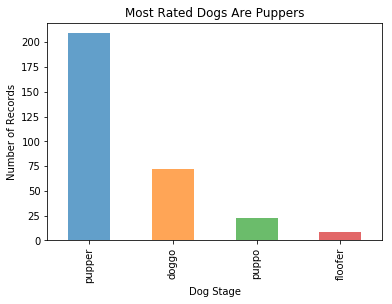

In [76]:
stages['dog_stage'].value_counts().plot(kind='bar', title="Most Rated Dogs Are Puppers", alpha=.7)
plt.xlabel('Dog Stage')
plt.ylabel('Number of Records')



#### 2: On what day of the week are most tweets created?

Text(0,0.5,'Count of Week Day')

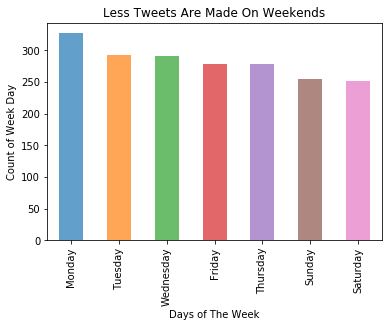

In [77]:
df['day_created'].value_counts().plot(kind='bar', title="Less Tweets Are Made On Weekends", alpha=.7)
plt.xlabel("Days of The Week")
plt.ylabel("Count of Week Day")

#### 3: Puppos are mostly liked by people.

In [78]:
dogstage_retweet = stages.groupby('dog_stage')['favorite_count'].mean()
dogstage_retweet

dog_stage
doggo      17266.291667
floofer    11612.125000
pupper      6464.095694
puppo      20444.869565
Name: favorite_count, dtype: float64

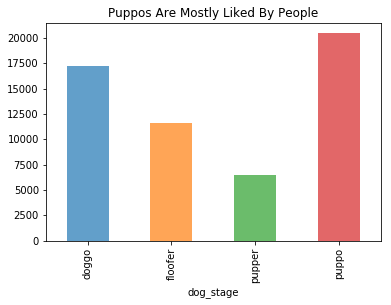

In [79]:
dogstage_retweet.plot(kind='bar', title="Puppos Are Mostly Liked By People", alpha=.7)
plt.xlabel=("Dog Stage")
plt.ylabel=('Average Favorite Count')

In [80]:
mean_ratings = stages.groupby('dog_stage')['rating_numerator'].mean()     
mean_ratings

dog_stage
doggo      11.777778
floofer    11.875000
pupper     10.727273
puppo      12.043478
Name: rating_numerator, dtype: float64

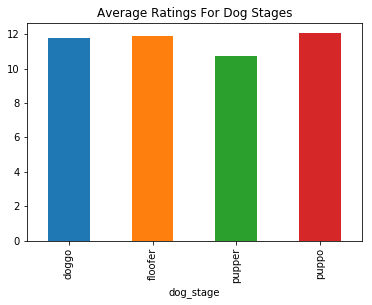

In [81]:
mean_ratings.plot(kind='bar', title="Average Ratings For Dog Stages")
plt.xlabel=("Dog Stages")
plt.ylabel=("Average Ratings")

### CONCLUSION

 Analysis of the dataset gathered from the twitter handle, @weratedogs, showed that despite the fact that more people own or have had contact with puppers, puppos are mostly people's favorite. This could most likely stem from the fact that puppers serve other purposes for most individuals or that individuals who own puppos have more humorous moments with them.